# <center>Checkpoint Regression </center> 

## 1. Read csv file

In [24]:
#read csv file
import pandas as pd
data=pd.read_csv(r"./kc_house_data.csv")
#get some dataset info
print(data.info())
#check if the dataset contains nan values
print("\n \n Total of Nan values on the given dataset: ",data.isna().sum().sum())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 2. Explore the dataset

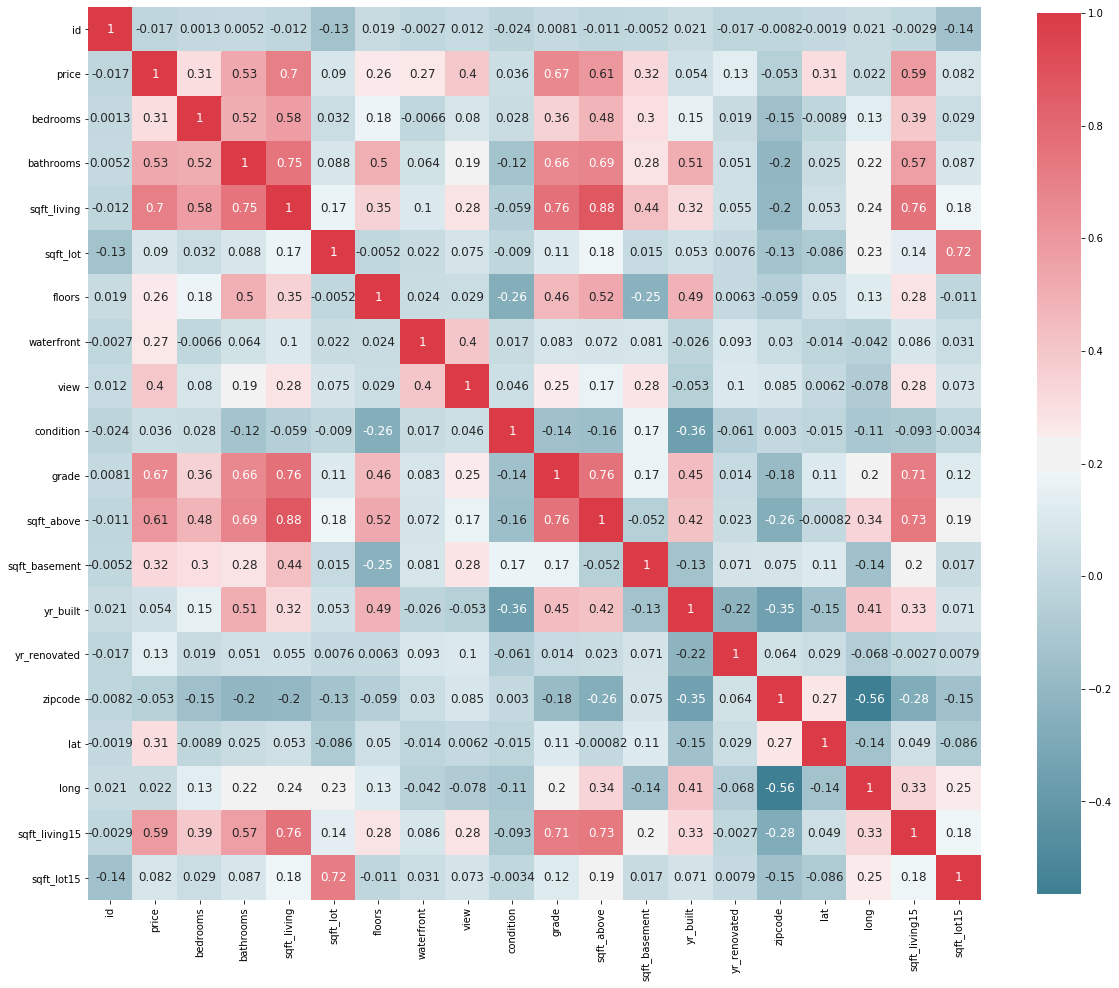

In [2]:
# create a heatmap, first, to detect the correlations between variables
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 20 , 18 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
    
plot_correlation_map(data)


## Correlation matrix' observations:
From the heatmap above we can see that home price is strongly correlated with both continious and ordinal variables:sqft_living, sqft_living15, sqft_above, grade and bathrooms


[Text(0.5, 1.0, 'Price vs Grade')]

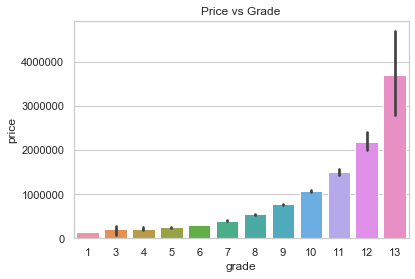

In [3]:
sns.set(style="whitegrid")
ax = sns.barplot(x="grade", y="price", data=data)
ax.set(title="Price vs Grade")

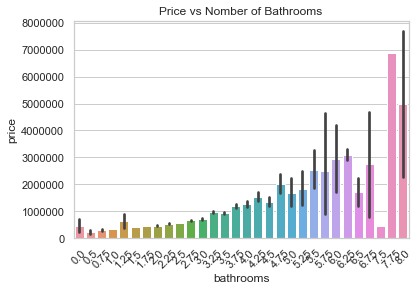

In [4]:
sns.set(style="whitegrid")
ax = sns.barplot(x="bathrooms", y="price", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(title="Price vs Nomber of Bathrooms")
plt.show()

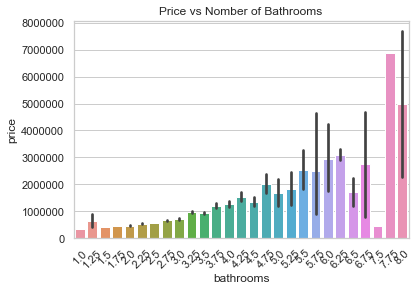

In [5]:
#correct outliers for nomber of bathroom <1
import numpy as np
data["bathrooms"] = np.where(data["bathrooms"] <1, 1,data['bathrooms'])
sns.set(style="whitegrid")
ax = sns.barplot(x="bathrooms", y="price", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(title="Price vs Nomber of Bathrooms")
plt.show()

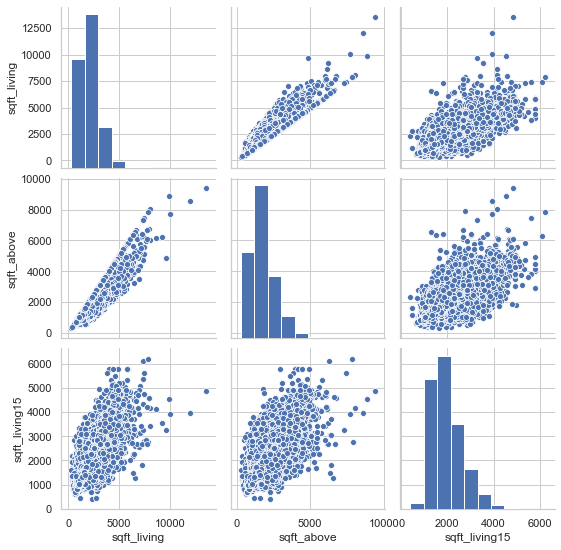

In [6]:
df = data[['sqft_living','sqft_above','sqft_living15']]
sns.pairplot(df, kind="scatter")
plt.show()

### Below Some conclusions from the data exploring step:
##### a. both grade and nomber of bathrooms are highly correlated with the price but the plotting shows that the linear relationship is more perfect between grade and price. so I think that grade could be the best condidate for making the predection model of price target
##### b. sqft_living and sqft_above are highly correlated with price, but there is a strong relationship between them. so for the predection model i select the feature with higher correlation with price, which is sqft_living
##### c. sqft_living15,   the average square footage of the 15th closest houses, because of its strong relationship with price I will use it for the defining the predection model of price target.

## 3. linear regression
for the linear regression, I will use the most correlated variable with price: sqft_living

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



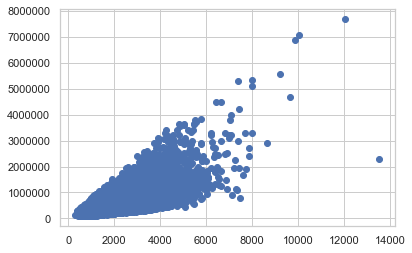

In [15]:
plt.scatter(data["sqft_living"],data["price"])
plt.show()

In [11]:
x=data["sqft_living"].values.reshape(-1,1)
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30) 
model=LinearRegression() 
model.fit(x_train,y_train)  
predicted=model.predict(x_test)
print("MSE linear regression: ", metrics.mean_squared_error(y_test, predicted))
print("R squaredlinear regression : ", metrics.r2_score(y_test,predicted))

MSE:  68506144015.533676
R squared:  0.49255184362595417


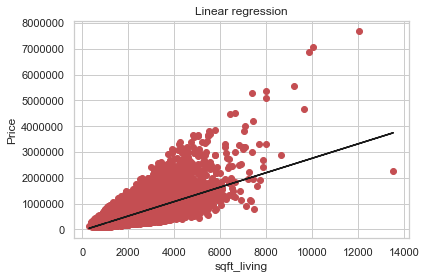

In [12]:
plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("Price")
plt.xlabel("sqft_living")
plt.plot(x, model.predict(x), color="k") 

# the previous model based on linear regression doesn't give a good prediciton, according to R squared it can predict only 50% of target

## 4. Multi linear regression
for the multi linear regression, the following variables will be used:"sqft_living","sqft_living15","grade" which are the stringly corelated with price one

In [14]:
x=data[["sqft_living","sqft_living15","grade"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30) 
model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 
print("MSE Multi linear regression: ", metrics.mean_squared_error(y_test, predicted))
print("R squared multi linear regression : ", metrics.r2_score(y_test,predicted))

MSE Multi linear regression:  63909015559.67269
R squared multi linear regression :  0.5454794513048398


## 5. plynomial regression



In [22]:
from sklearn.preprocessing import PolynomialFeatures 

x=data[["sqft_living","sqft_living15","grade"]]
y=data["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30) 
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
predicted = lg.predict(x_test_fit)

print("MSE Multi linear regression: ", metrics.mean_squared_error(y_test, predicted))
print("R squared multi linear regression : ", metrics.r2_score(y_test,predicted))

MSE Multi linear regression:  51535945316.82652
R squared multi linear regression :  0.5865586081814417


# the model given by multi linear regression and polynomial regression gives slightly better predictions thant the one obtained by applying linear regression!
